# Final Project _ Regression Model of Predictive Analysis for Business Application

1. Problem statment:

Help Company to find the relationship between advertising cost and advertising clicks, and this relationship can be used to predict the results of advertising clicks! It is useful for us to make a plan for the company cost and market analysis.


2. Data Description & Setup:

A collection of a total of 40 days of webpage ad cost and click volume data. The data set is from my statistic text book ("Applied Linear Regression Model") data sourses.


In [2]:
# The first is the preparation before the start. 
# In the process of creating the regression model, 
# we need to use the following library files: sklearn library, numpy library, pandas library and matplotlib library. 
# The sklearn library is used to calculate key parameters in a linear regression model and to test the model. 
# The numpy and pandas libraries are used for data import, creating data tables and some basic calculations. 
# The matplotlib library is used to draw scatter plots.
from sklearn import linear_model
from sklearn import cross_validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/yuyiran/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# import data into new frame and read the data
cost_and_click=pd.DataFrame(pd.read_excel('cost_and_click.xlsx'))

In [8]:
# print first 5 rows of the dataset
cost_and_click.head()


,cost,click
0,10968,1131
1,8216,876
2,9971,856
3,7279,694
4,8793,789


In [9]:
# set cost as independent variable X
X =np.array(cost_and_click[['cost']])
# set click as dependent variable Y
Y =np.array(cost_and_click['click'])
# Print the shape of dataset 
X.shape,Y.shape

((40, 1), (40,))

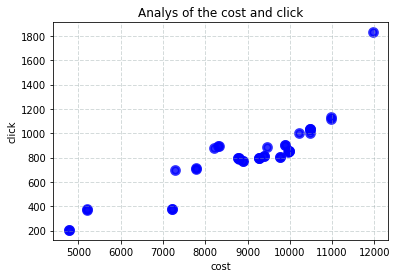

In [10]:
# Make the scatter plot 
plt.scatter(X,Y,60,color='blue',marker='o',linewidth=3,alpha=0.8)
# set x label
plt.xlabel('cost')
# set y label
plt.ylabel('click')
# set title
plt.title('Analys of the cost and click')
# set other parameters
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)
# print plot
plt.show()

3. Algorithm Explanation:

In the original data, we recorded a total of 40 days of advertising cost and click data. The 40 days data were divided into two parts, one was used as a training set to create a regression model, and the other part was used as a test set to test the results of the regression model. The following is a specific data grouping code that uses a random method to extract 40% from 40 records as a test set and 60% as training set data. 

Here we have only one independent variable X, so it is a one-way regression model. Where slope b1 and intercept b0 are the key parameter values we require.For the regression model, it is also necessary to calculate the decision coefficient, which is R square, to explain the interpretation of the independent variable to the dependent variable.

With the previous slope and intercept, we can plot the relationship between the cost of the ad and the amount of clicks on the ad, and use this relationship to predict the results of the ad clicks.

In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test= cross_validation.train_test_split(X, Y, test_size=0.4, random_state=0)

In [12]:
X_train.shape,y_train.shape

((24, 1), (24,))

In [13]:
# Substitution linear regression model
clf =linear_model.LinearRegression()
clf.fit (X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Compute slope b1
clf.coef_

array([0.12718482])

In [15]:
# Compute intercept bo
clf.intercept_

-338.95787455636366

In [16]:
# Compute R sequare
clf.score(X_train,y_train)

0.8346545132757202

In [17]:
# Substituting the independent variables of the test set into the model predictor dependent variable. 
list(clf.predict(X_test))

[927.9301404401098,
 865.2280230429345,
 992.1584757049644,
 779.3782679859504,
 1183.1900788095427,
 992.4128453495779,
 841.0629068046723,
 718.7111077456815,
 853.9085738576433,
 792.0967502166146,
 903.6378393795409,
 992.5400301718845,
 267.9680974909379,
 929.2019886631762,
 919.1543877009514,
 1055.4965172136726]

In [18]:
list(y_test)

[846,
 887,
 999,
 789,
 1831,
 1032,
 795,
 896,
 811,
 772,
 805,
 1033,
 205,
 856,
 900,
 1120]

The results were compared to the dependent variables of the test set to assess the accuracy of the model within the error tolerance. 

In [19]:
# error tolerance square sum
((y_test - clf.predict(X_test))**2).sum()

489566.49048230547

4. Result:

For now, we could predict any click number the company want then get the predictive result of the cost of ad, it is a good way for the company to make a plan for their cost. 

In [20]:
# here is an example for getting the predictive result
clf.predict(20000)

array([2204.73857158])